
<img src="fga.png" width="1200" height="400">


<h1><center>Aula Extra 1 - Leitura de Dados e Exploratory Data Analysis (EDA)
</center></h1>

Sempre que iniciamos um projeto de aprendizado de máquina (ML) ou modelagem estatística, precisamos primeiro fazer uma análise exploratória de dados (EDA). Isso inclui coisas como: plotagens de dados brutos, histogramas e muito mais ...

<ul>
    <li> <b>Sinais Financeiros - UnB</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li> </a>
    <li> <b>19/02/2021</b> </li>
</ul>


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol> 
        <li><a href="#Leitura 1">Leitura de preços - investpy</a></li>
        <li><a href="#Leitura 2">Leitura de preços - Dados Pagos</a></li>
        <li><a href="#Leitura 3">Leitura de preços - MetaTrader</a></li>
        <li><a href="#Graficos"> Representações Gráficas do preço e do retorno </a></li>
    </ol>
</div>
<br>
<hr>

<h2>Bibliotecas de Refência</h2>

In [3]:
!pip install yfinance

import pandas as pd
#import investpy
import yfinance as yf
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
plt.style.use('dark_background')


<div id="Leitura 1">
    <h2>1) Leitura de preços - Método 1: investpy</h2>
</div>

In [4]:
df = pd.read_html('http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IBOV&idioma=pt-br')
df[0]['Código'].values

array(['ABEV3', 'ASAI3', 'AZUL4', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4',
       'BBSE3', 'BEEF3', 'BPAC11', 'BRAP4', 'BRDT3', 'BRFS3', 'BRKM5',
       'BRML3', 'BTOW3', 'CCRO3', 'CIEL3', 'CMIG4', 'COGN3', 'CPFE3',
       'CPLE6', 'CRFB3', 'CSAN3', 'CSNA3', 'CVCB3', 'CYRE3', 'ECOR3',
       'EGIE3', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3', 'ENEV3', 'ENGI11',
       'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4', 'GNDI3', 'GOAU4', 'GOLL4',
       'HAPV3', 'HGTX3', 'HYPE3', 'IGTA3', 'IRBR3', 'ITSA4', 'ITUB4',
       'JBSS3', 'JHSF3', 'KLBN11', 'LAME4', 'LCAM3', 'LREN3', 'MGLU3',
       'MRFG3', 'MRVE3', 'MULT3', 'NTCO3', 'PCAR3', 'PETR3', 'PETR4',
       'PRIO3', 'QUAL3', 'RADL3', 'RAIL3', 'RENT3', 'SANB11', 'SBSP3',
       'SULA11', 'SUZB3', 'TAEE11', 'TIMS3', 'TOTS3', 'UGPA3', 'USIM5',
       'VALE3', 'VIVT3', 'VVAR3', 'WEGE3', 'YDUQ3',
       'Quantidade Teórica Total  Redutor'], dtype=object)

In [6]:
todayB = dt.date.today()
yesterdayB = todayB - dt.timedelta(days=3*365)
print(todayB,yesterdayB)


2022-06-19 2019-06-20


In [7]:
yf.download('CRM', start=str(yesterdayB), end=str(todayB)) 

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-20,156.289993,158.289993,155.419998,157.199997,157.199997,10153600
2019-06-21,156.669998,157.789993,155.940002,156.839996,156.839996,9706900
2019-06-24,157.389999,157.729996,152.509995,152.559998,152.559998,6378200
2019-06-25,152.830002,152.970001,148.589996,149.339996,149.339996,7362500
2019-06-26,151.279999,151.380005,148.919998,149.039993,149.039993,5844900
...,...,...,...,...,...,...
2022-06-13,170.550003,172.679993,165.059998,166.029999,166.029999,10726200
2022-06-14,168.729996,169.630005,162.149994,164.449997,164.449997,8576200
2022-06-15,166.729996,171.500000,164.679993,168.550003,168.550003,7740700


In [8]:
def historicalDay(coin,yesterdayB,todayB):
    df = yf.download(coin, start=str(yesterdayB), end=str(todayB)) 
    df=df[df.columns[:4]]
    return df

df = pd.read_html('http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IBOV&idioma=pt-br')
symbols=list(df[0]['Código'].values)
symbols=[sy+".SA" for sy in symbols[:-1]]

#symbols=[sy+".sa" for sy in symbols[:-1]]
np.array(symbols)

array(['ABEV3.SA', 'ASAI3.SA', 'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA',
       'BBDC3.SA', 'BBDC4.SA', 'BBSE3.SA', 'BEEF3.SA', 'BPAC11.SA',
       'BRAP4.SA', 'BRDT3.SA', 'BRFS3.SA', 'BRKM5.SA', 'BRML3.SA',
       'BTOW3.SA', 'CCRO3.SA', 'CIEL3.SA', 'CMIG4.SA', 'COGN3.SA',
       'CPFE3.SA', 'CPLE6.SA', 'CRFB3.SA', 'CSAN3.SA', 'CSNA3.SA',
       'CVCB3.SA', 'CYRE3.SA', 'ECOR3.SA', 'EGIE3.SA', 'ELET3.SA',
       'ELET6.SA', 'EMBR3.SA', 'ENBR3.SA', 'ENEV3.SA', 'ENGI11.SA',
       'EQTL3.SA', 'EZTC3.SA', 'FLRY3.SA', 'GGBR4.SA', 'GNDI3.SA',
       'GOAU4.SA', 'GOLL4.SA', 'HAPV3.SA', 'HGTX3.SA', 'HYPE3.SA',
       'IGTA3.SA', 'IRBR3.SA', 'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA',
       'JHSF3.SA', 'KLBN11.SA', 'LAME4.SA', 'LCAM3.SA', 'LREN3.SA',
       'MGLU3.SA', 'MRFG3.SA', 'MRVE3.SA', 'MULT3.SA', 'NTCO3.SA',
       'PCAR3.SA', 'PETR3.SA', 'PETR4.SA', 'PRIO3.SA', 'QUAL3.SA',
       'RADL3.SA', 'RAIL3.SA', 'RENT3.SA', 'SANB11.SA', 'SBSP3.SA',
       'SULA11.SA', 'SUZB3.SA', 'TAEE11.SA', 'TIMS3.SA', '

In [11]:
todayB = dt.date.today()
yesterdayB = todayB - dt.timedelta(days=2*365)
print(todayB,yesterdayB)

outClose, outHigh, outLow = pd.DataFrame(),pd.DataFrame(),pd.DataFrame()
cols=[]

for symbol in tqdm(symbols):
    try: 
        df=historicalDay(symbol,yesterdayB,todayB)

        dfOutClose = df['Close']
        dfOutHigh  = df['High']
        dfOutLow   = df['Low']
        
        outClose = pd.concat([outClose,dfOutClose],axis=1)
        outHigh = pd.concat([outHigh,dfOutHigh],axis=1)        
        outLow  = pd.concat([outLow, dfOutLow],axis=1)  
        
        cols.append(symbol)
    except:
        print("Erro",symbol)
        
outClose.columns=cols
outHigh.columns=cols
outLow.columns=cols

2022-06-19 2020-06-19


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BRDT3.SA: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%*******

In [12]:
output=outClose.copy()

In [13]:
output.head()

,ABEV3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BPAC11.SA,...,TAEE11.SA,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT3.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
2020-06-19,13.84,NaN,21.799999,17.000000,33.939999,16.520660,18.479338,28.790001,13.64,18.000000,...,28.969999,14.48,22.590000,18.660000,6.98,55.169998,50.950001,NaN,23.105000,35.240002
2020-06-22,14.11,NaN,20.629999,16.776667,33.240002,16.231403,17.834709,28.830000,12.98,18.997499,...,28.840000,14.40,22.639999,18.340000,6.96,55.000000,49.790001,NaN,22.799999,35.200001
2020-06-23,13.93,NaN,22.500000,17.426666,33.529999,16.239670,17.809917,28.750000,12.94,19.615000,...,28.540001,14.20,22.840000,18.459999,7.68,55.590000,49.240002,NaN,23.059999,37.049999
2020-06-24,13.68,NaN,21.100000,17.549999,32.220001,15.884297,17.231403,28.370001,13.15,19.174999,...,28.190001,13.99,22.410000,18.490000,7.33,55.389999,48.639999,NaN,23.025000,35.130001
2020-06-25,14.18,NaN,21.200001,18.333332,33.009998,16.223141,17.644629,29.000000,12.95,19.225000,...,28.299999,14.20,23.070000,18.309999,7.29,56.000000,49.560001,NaN,24.610001,34.750000


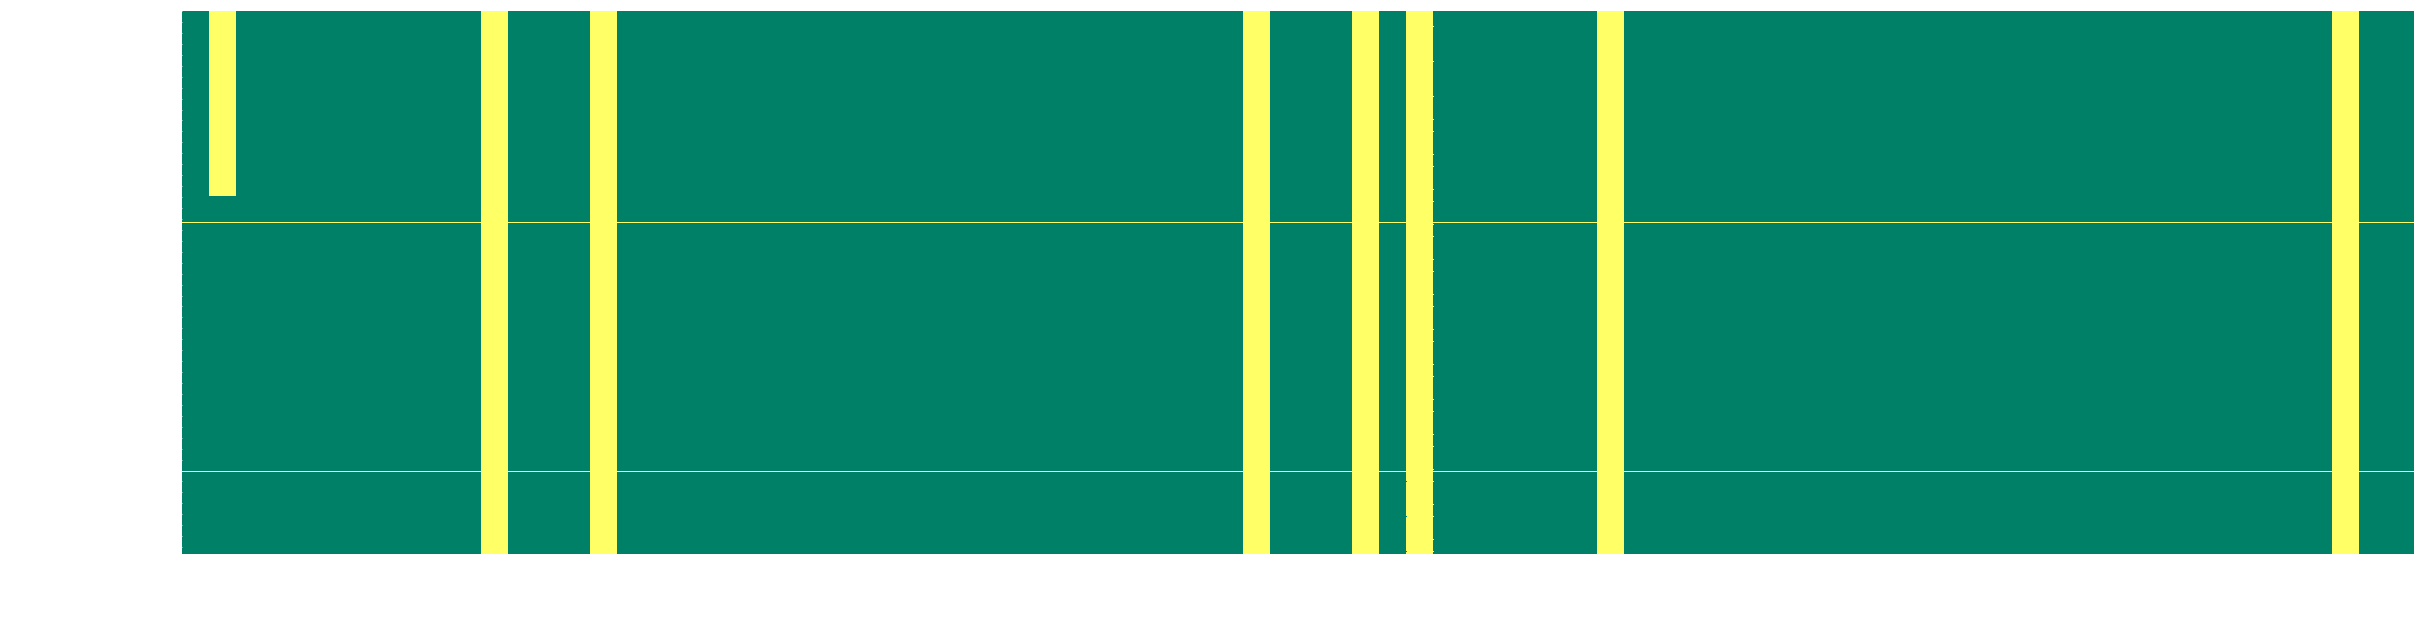

In [14]:
%matplotlib inline 
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')

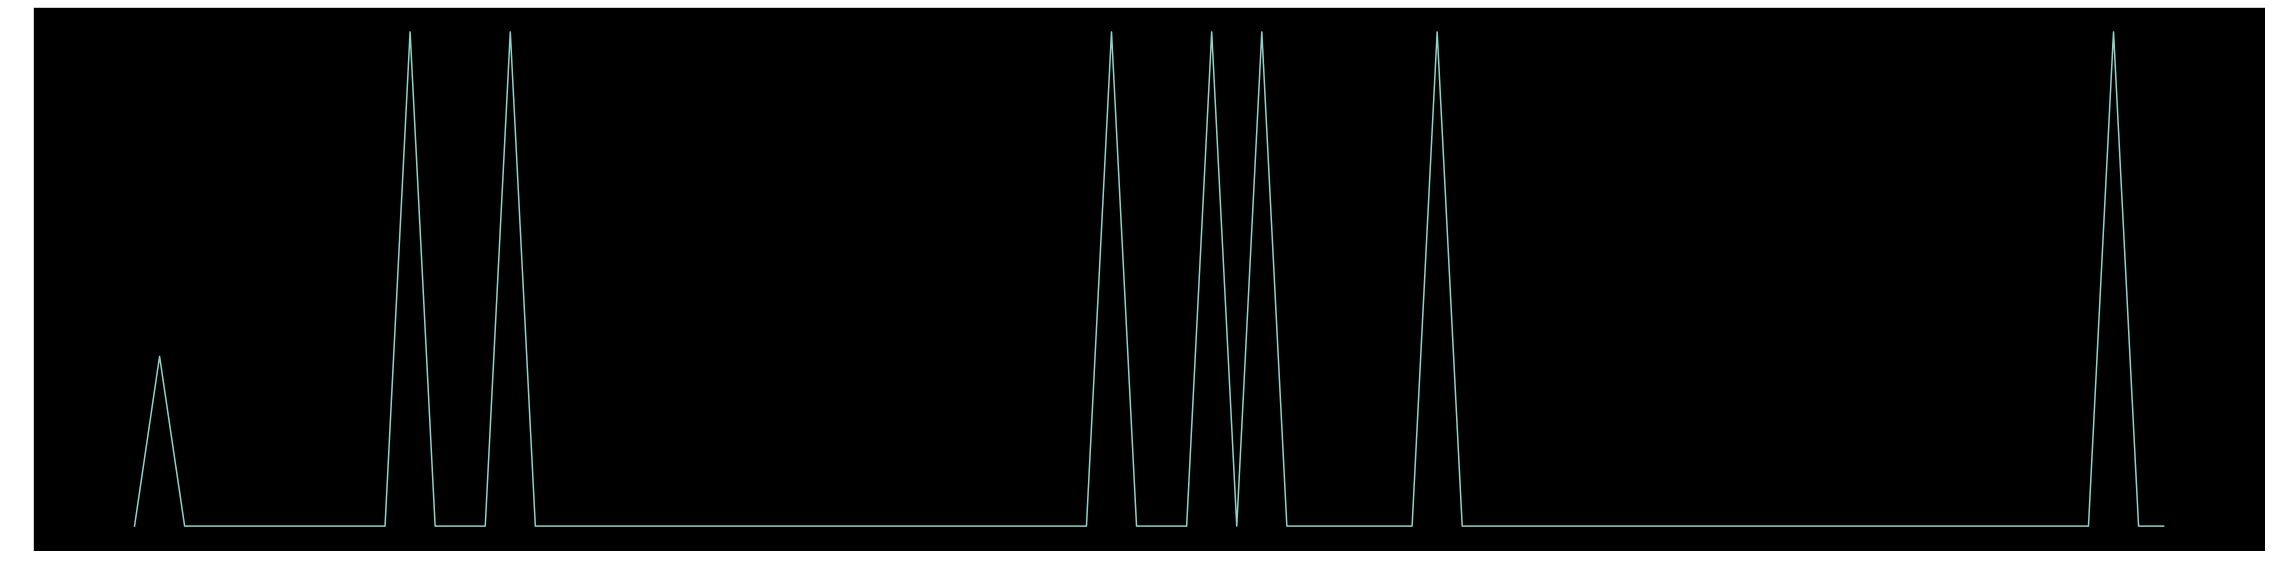

In [15]:

plt.figure(figsize=(40,10))
plt.plot(cols ,output.isnull().sum().values)

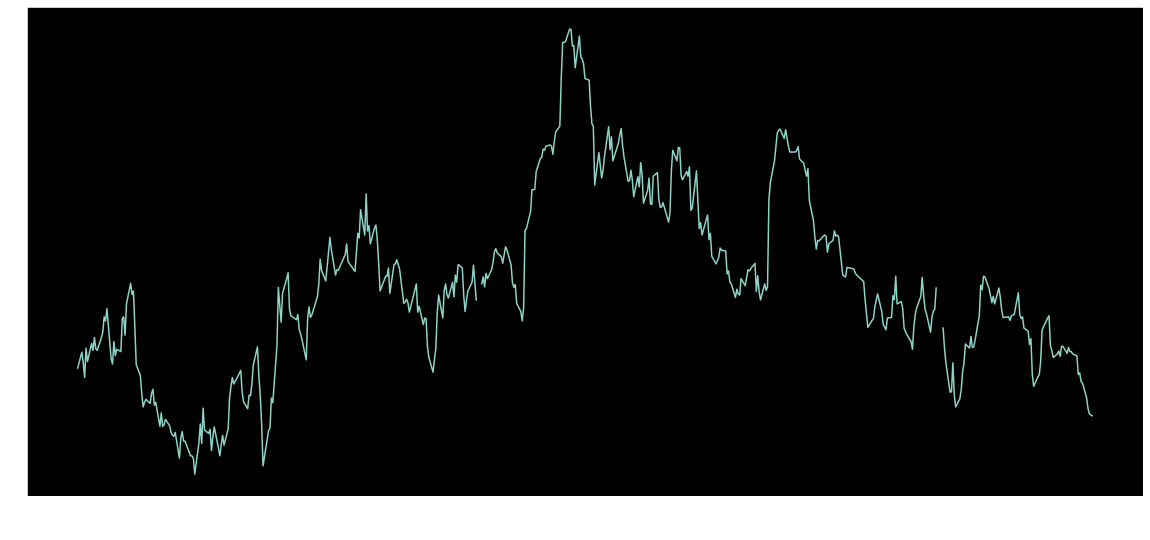

In [17]:
output['ABEV3.SA'].plot(figsize=(20,10))

<div id="Leitura 2">
    <h2>2) Leitura de preços - Método 2: Dados Pagos</h2>
</div>

In [20]:
from os import listdir
from os.path import isfile, join

dir_data='./Arquivos da Aula 1 Extra/data_csv/'
csvs = [f for f in listdir(dir_data) if isfile(join(dir_data, f)) and f.endswith("csv")]
len(csvs)

140

In [25]:
li = []
for csv in csvs:
    df = pd.read_csv(dir_data+csv, index_col=None, header=None)
    li.append(df[[0,4]][1:])

output = None

for i in range(len(li)):

    if output is None:
        df = li[i]
        df.columns=['date',csvs[i][0:5]]
        df['date']=[pd.to_datetime(df['date'].iloc[i][:10], format='%d/%m/%Y') for i in range(len(df))]
        df=df.set_index('date')
        output=df

    else:
        df = li[i]
        df.columns=['date',csvs[i][0:5]]
    #    
        df=df.set_index('date')
        output=pd.concat([output,df],axis=1) 
output.reset_index( inplace=True)        
output['index']=[pd.to_datetime(output['index'].iloc[i][:10], format='%d/%m/%Y') for i in range(len(output))]        
output=output.sort_values(by='index')
output=output.set_index('index')
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')

KeyError: 'index'

In [14]:
output.tail()

,AMAR3,ABCB4,BRKM5,CPLE6,BRPR3,ALPA4,CSAN3,BPAN4,BTOW3,BKBR3,...,CCRO3,CIEL3,BBAS3,ANIM3,COGN3,BBSE3,BRDT3,CRFB3,BRAP4,ARZZ3
index,,,,,,,,,,,,,,,,,,,,,
2019-12-10,11.40,18.91,29.13,65.29,13.98,32.00,66.34,9.30,61.30,15.90,...,17.15,8.10,47.77,24.28,11.16,36.19,27.24,19.53,36.15,66.60
2019-12-11,11.61,18.97,29.33,65.03,14.40,33.08,68.51,9.28,61.40,15.86,...,17.30,8.25,47.70,24.84,11.95,36.35,27.52,20.07,36.40,66.00
2019-12-12,11.79,19.48,29.29,64.80,14.58,32.30,68.95,9.30,64.61,16.10,...,17.28,8.40,48.91,26.51,12.10,36.50,27.80,20.98,36.99,65.63
2019-12-13,11.72,19.36,29.13,65.49,14.64,33.20,69.30,9.62,66.20,16.60,...,17.54,8.78,48.53,27.97,12.20,37.35,27.52,20.80,37.82,65.60
2019-12-16,11.80,19.36,28.64,66.01,14.48,32.99,69.33,9.55,66.54,17.13,...,17.77,8.33,47.87,28.04,12.10,36.82,28.50,21.02,37.75,64.70


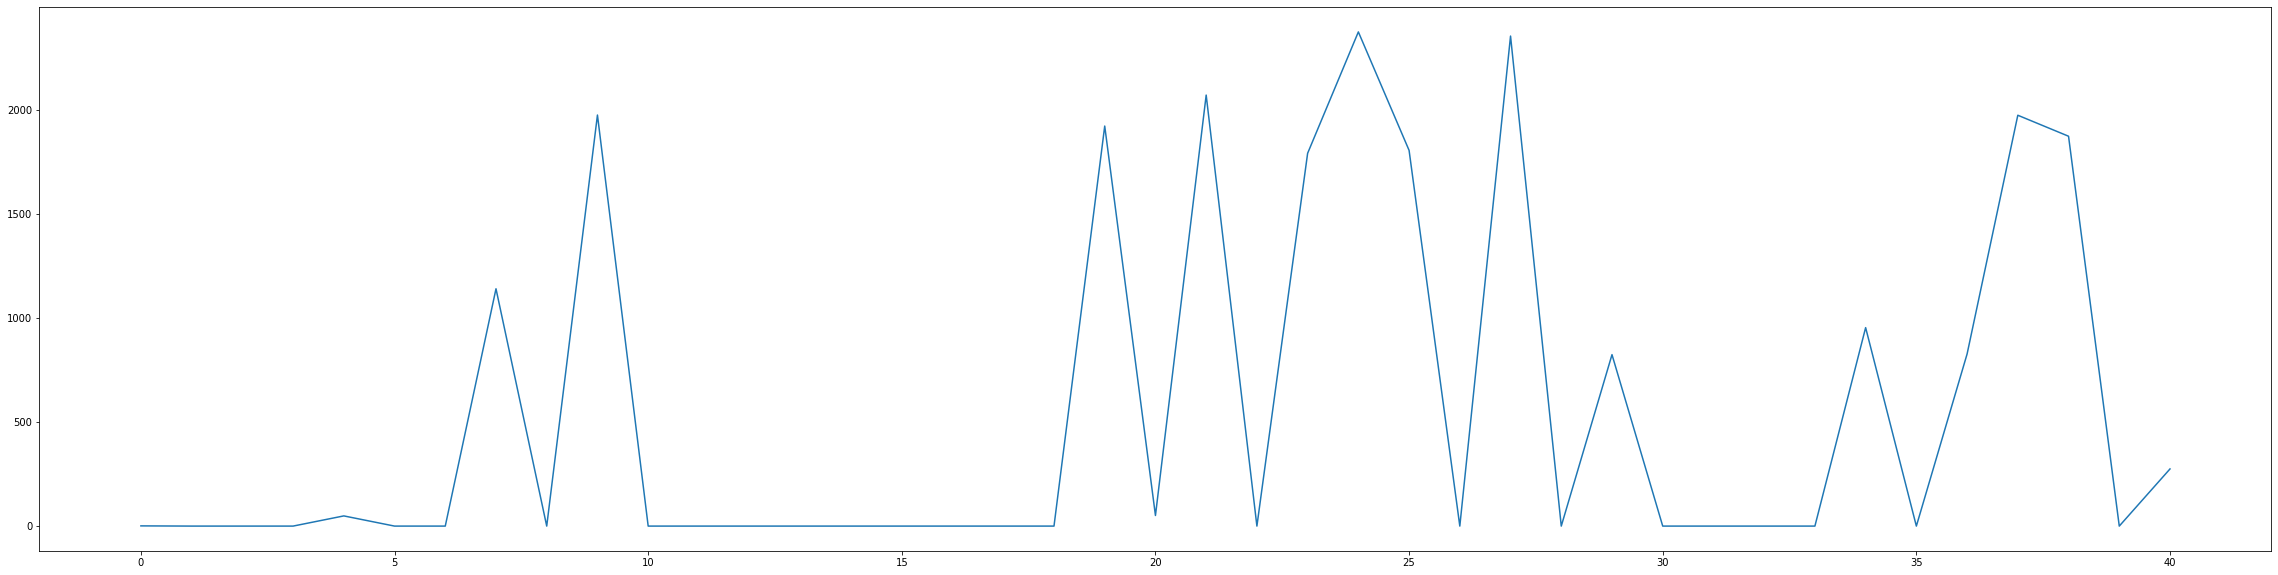

In [15]:
plt.figure(figsize=(40,10))
plt.plot(output.isnull().sum().values)

In [16]:
list(output.columns[output.isnull().sum()>0.1*len(output)])

['BPAN4',
 'BKBR3',
 'CAML3',
 'BIDI4',
 'BPAC1',
 'ALSO3',
 'AZUL4',
 'BIDI1',
 'ALUP1',
 'ANIM3',
 'BBSE3',
 'BRDT3',
 'CRFB3',
 'ARZZ3']

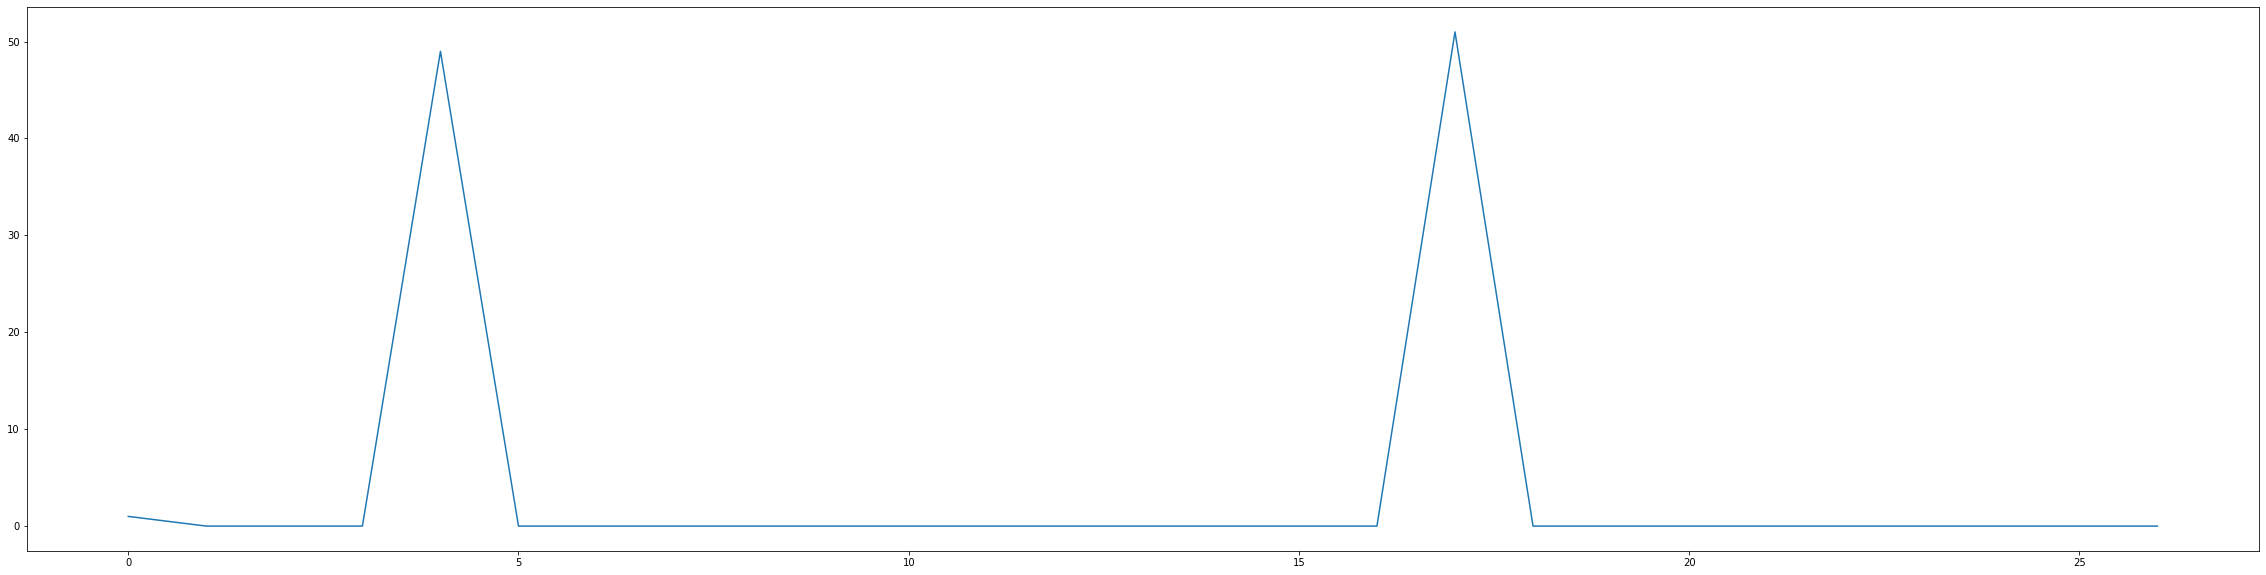

In [17]:
cols_remove=list(output.columns[output.isnull().sum()>0.1*len(output)])
output.drop(cols_remove, axis=1,inplace=True)
plt.figure(figsize=(40,10))
plt.plot(output.isnull().sum().values)

<AxesSubplot:ylabel='index'>

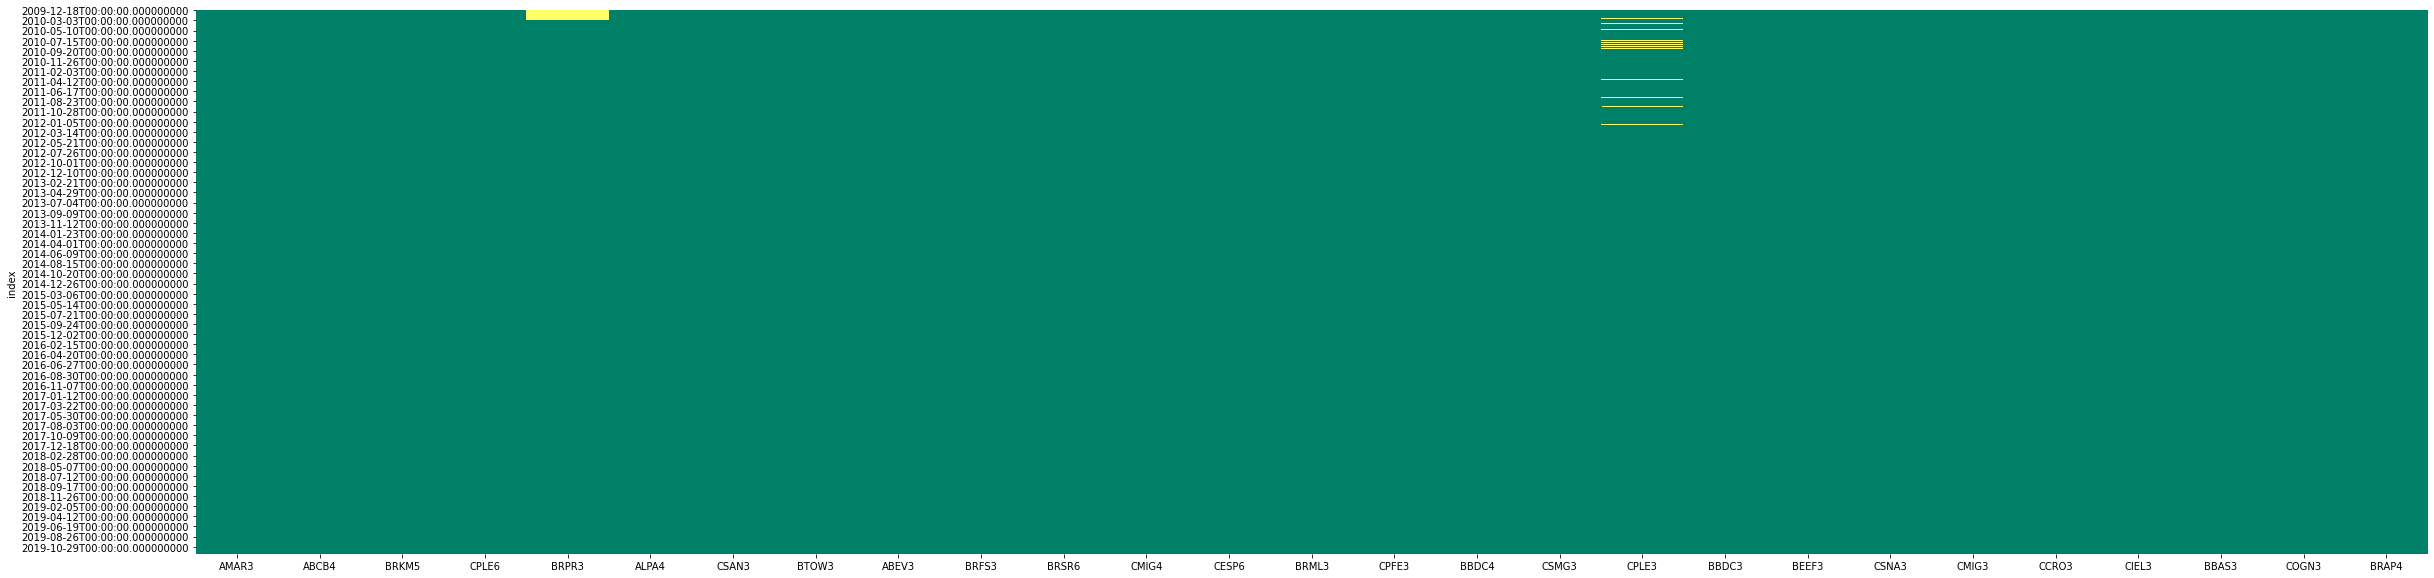

In [18]:
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')

['Erros', 0, 'Ativos', 24]

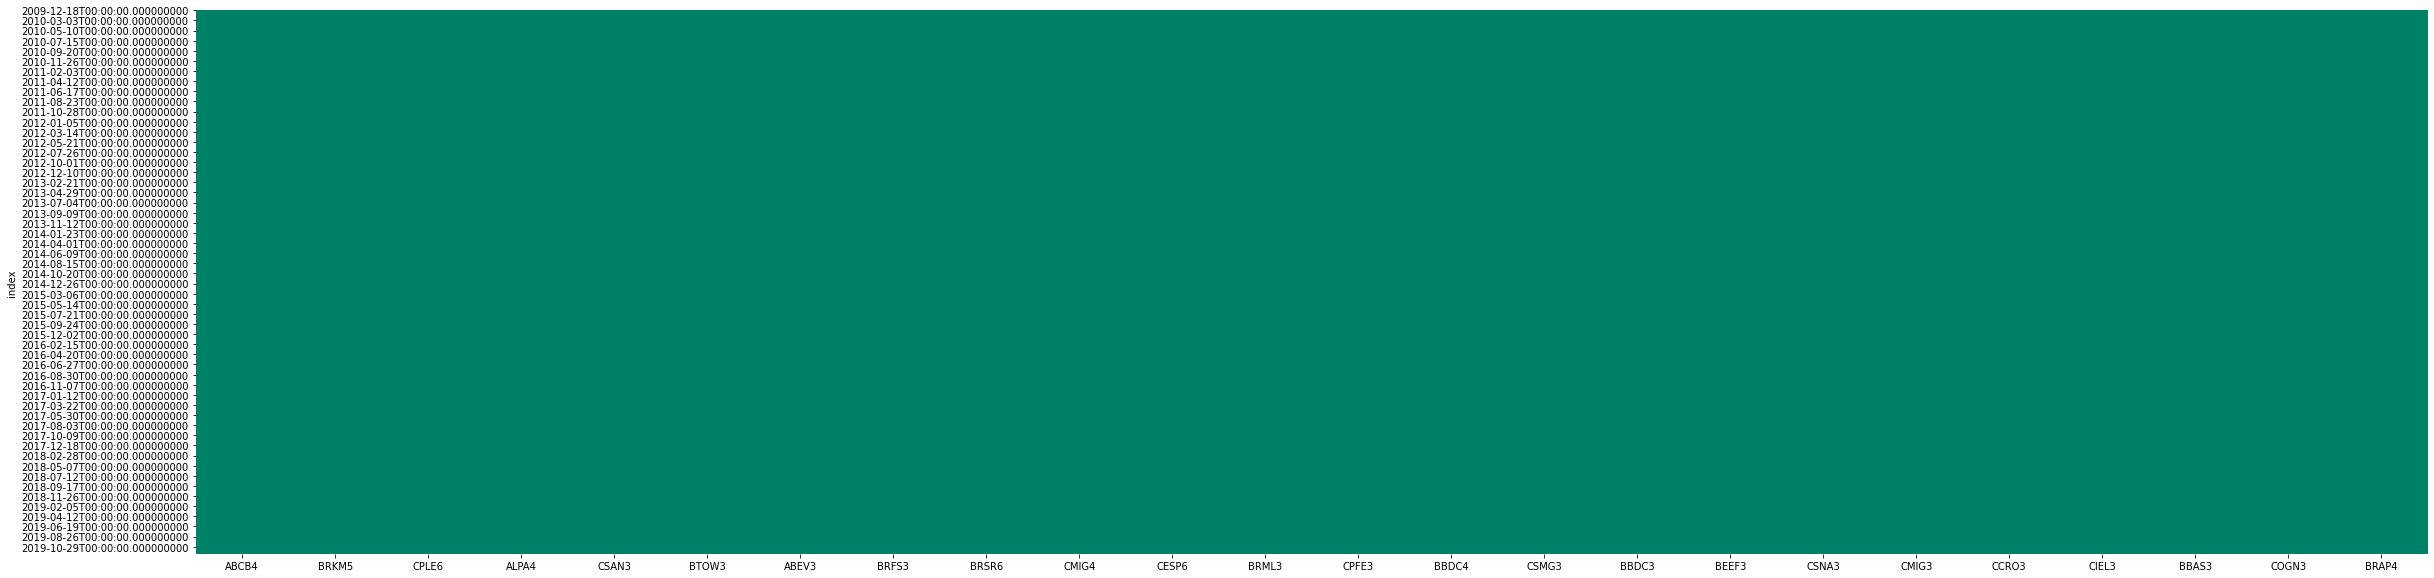

In [19]:
import numpy as np
output=output.dropna(axis='columns')
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(output.isnull().sum()),"Ativos",len(output.columns)]

<div id="Leitura 3">
    <h2>3) Leitura de preços - Método 3: MetaTrader</h2>
</div>

In [20]:
dir_data='./data_mt5/'
csvs = [f for f in listdir(dir_data) if isfile(join(dir_data, f)) and f.endswith("csv")]
li = []
import csv
from csv import reader
print(csv.__file__)
output = None


for csv in csvs:
    price=[]
    with open(dir_data+csv, 'r', encoding="utf16") as csvfile:
        readCSV = reader(csvfile, delimiter=',')
        for row in readCSV:
            price.append([row[0].split('\t')[0][0:10],row[0].split('\t')[1]])
        df=pd.DataFrame(price)
        df.columns=['data',csv[:-4]]
        df=df.set_index('data')

        if output is None:
            output=df
        else:
            output=pd.concat([output,df],axis=1) 

output=output.astype(float)    
output[["PETR3","GGBR4","LAME4","WEGE3"]].dropna().tail()


/usr/lib/python3.6/csv.py


,PETR3,GGBR4,LAME4,WEGE3
2020.06.05,22.62,15.17,29.70,44.22
2020.06.09,22.46,14.96,30.25,45.69
2020.06.12,21.03,13.88,31.30,44.14
2020.06.15,21.11,13.55,31.80,44.16
2020.06.16,21.98,14.80,31.56,44.65


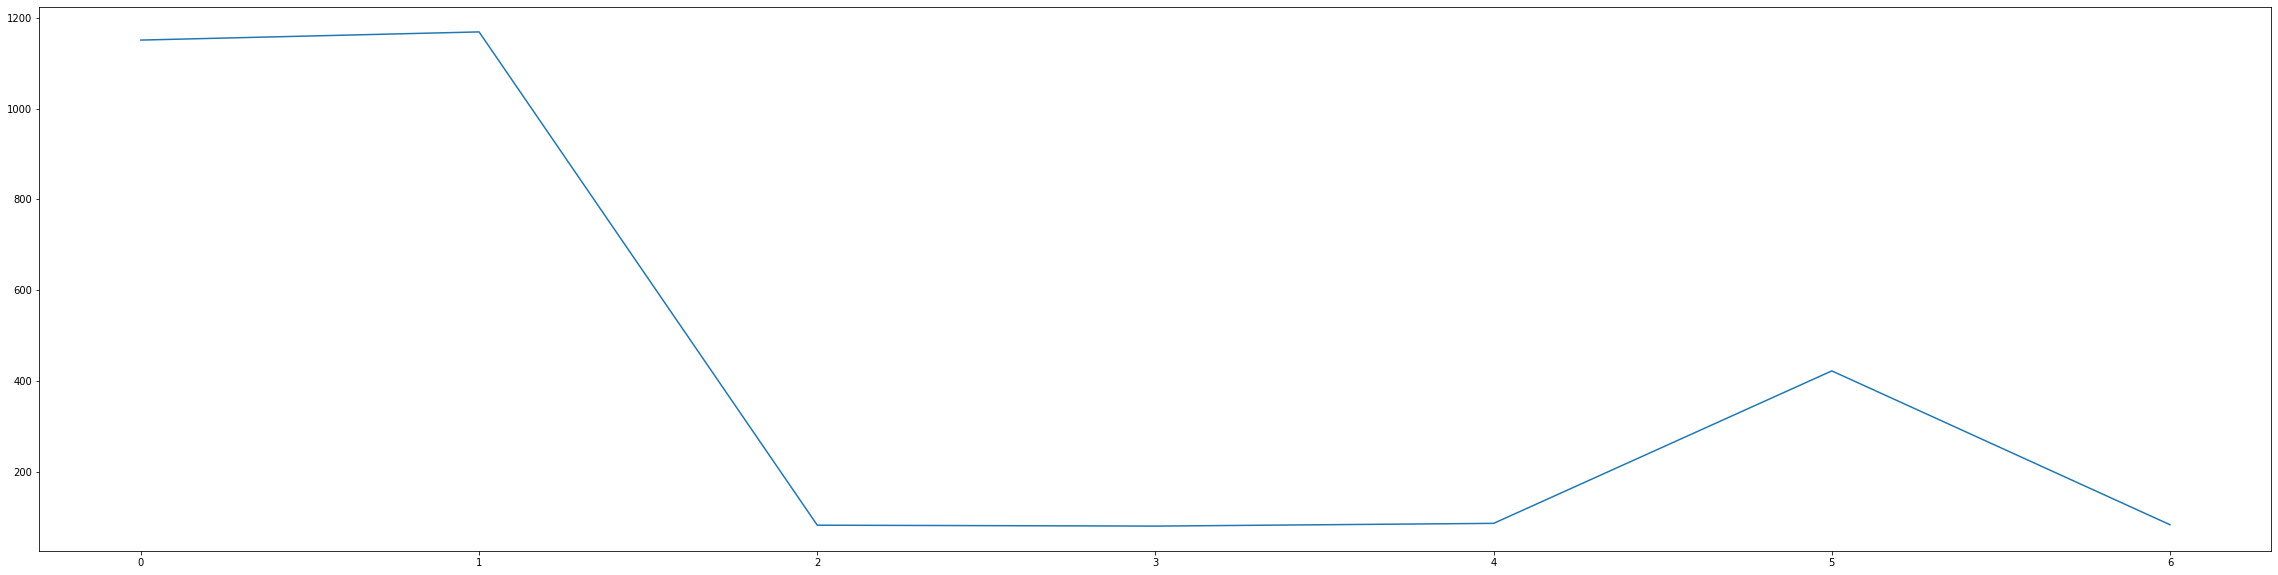

In [21]:
plt.figure(figsize=(40,10))
plt.plot(output.isnull().sum().values)

['Erros', 3073, 'Ativos', 7]

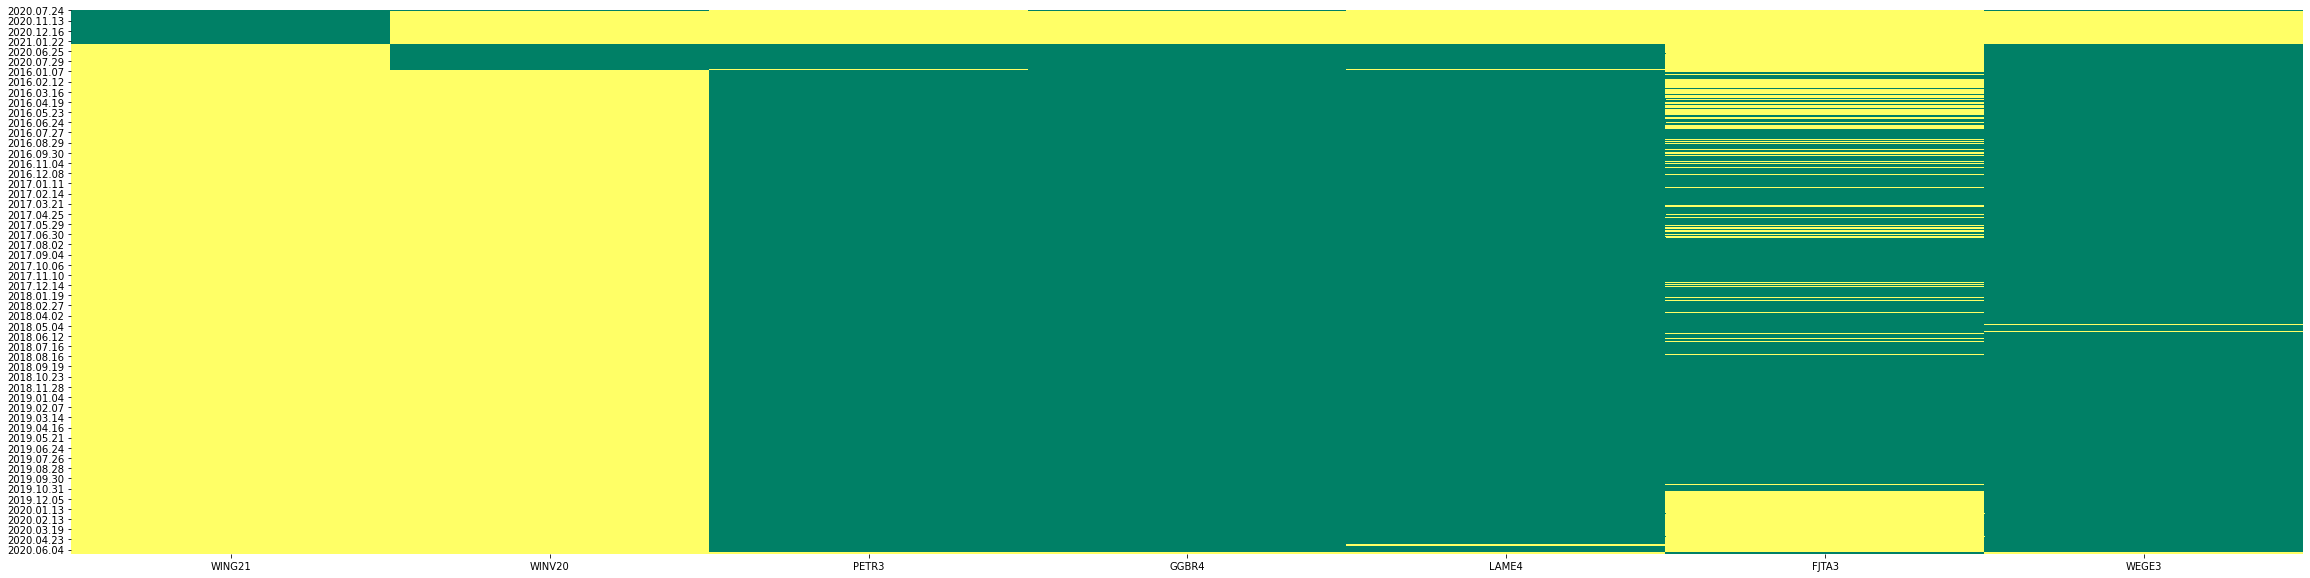

In [22]:
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(output.isnull().sum()),"Ativos",len(output.columns)]

In [23]:
output.to_html("output.html")

<div id="Graficos">
    <h2>4) Representações Gráficas do preço e do retorno</h2>
</div>

In [26]:

todayB = dt.date.today()
yesterdayB = todayB - dt.timedelta(days=2*365)
print(todayB,yesterdayB)

outClose= pd.DataFrame()
cols=[]

for symbol in tqdm(symbols[:20]):
    try: 
        df=historicalDay(symbol,yesterdayB,todayB)

        dfOutClose = df['Close']
    
        
        outClose = pd.concat([outClose,dfOutClose],axis=1)

        
        cols.append(symbol)
    except:
        print("Erro",symbol)
        
outClose.columns=cols
output=outClose.copy()

2022-06-19 2020-06-19


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BRDT3.SA: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%*******

In [27]:
output.columns

Index(['ABEV3.SA', 'ASAI3.SA', 'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA',
       'BBDC4.SA', 'BBSE3.SA', 'BEEF3.SA', 'BPAC11.SA', 'BRAP4.SA', 'BRDT3.SA',
       'BRFS3.SA', 'BRKM5.SA', 'BRML3.SA', 'BTOW3.SA', 'CCRO3.SA', 'CIEL3.SA',
       'CMIG4.SA', 'COGN3.SA'],
      dtype='object')

['Erros', 1180, 'Ativos', 20]

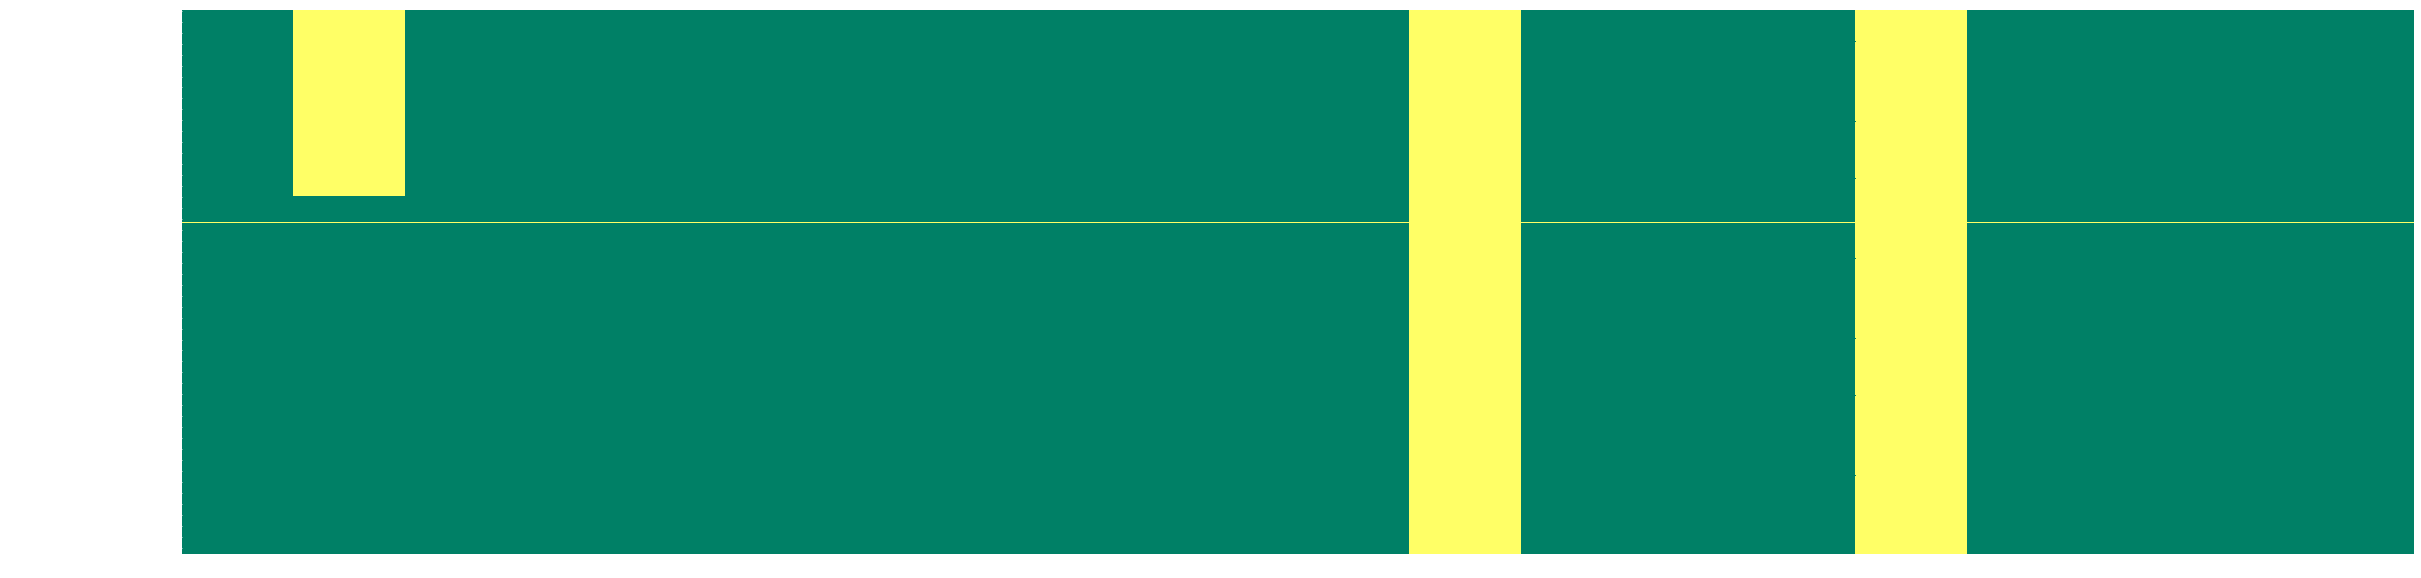

In [28]:
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(output.isnull().sum()),"Ativos",len(output.columns)]

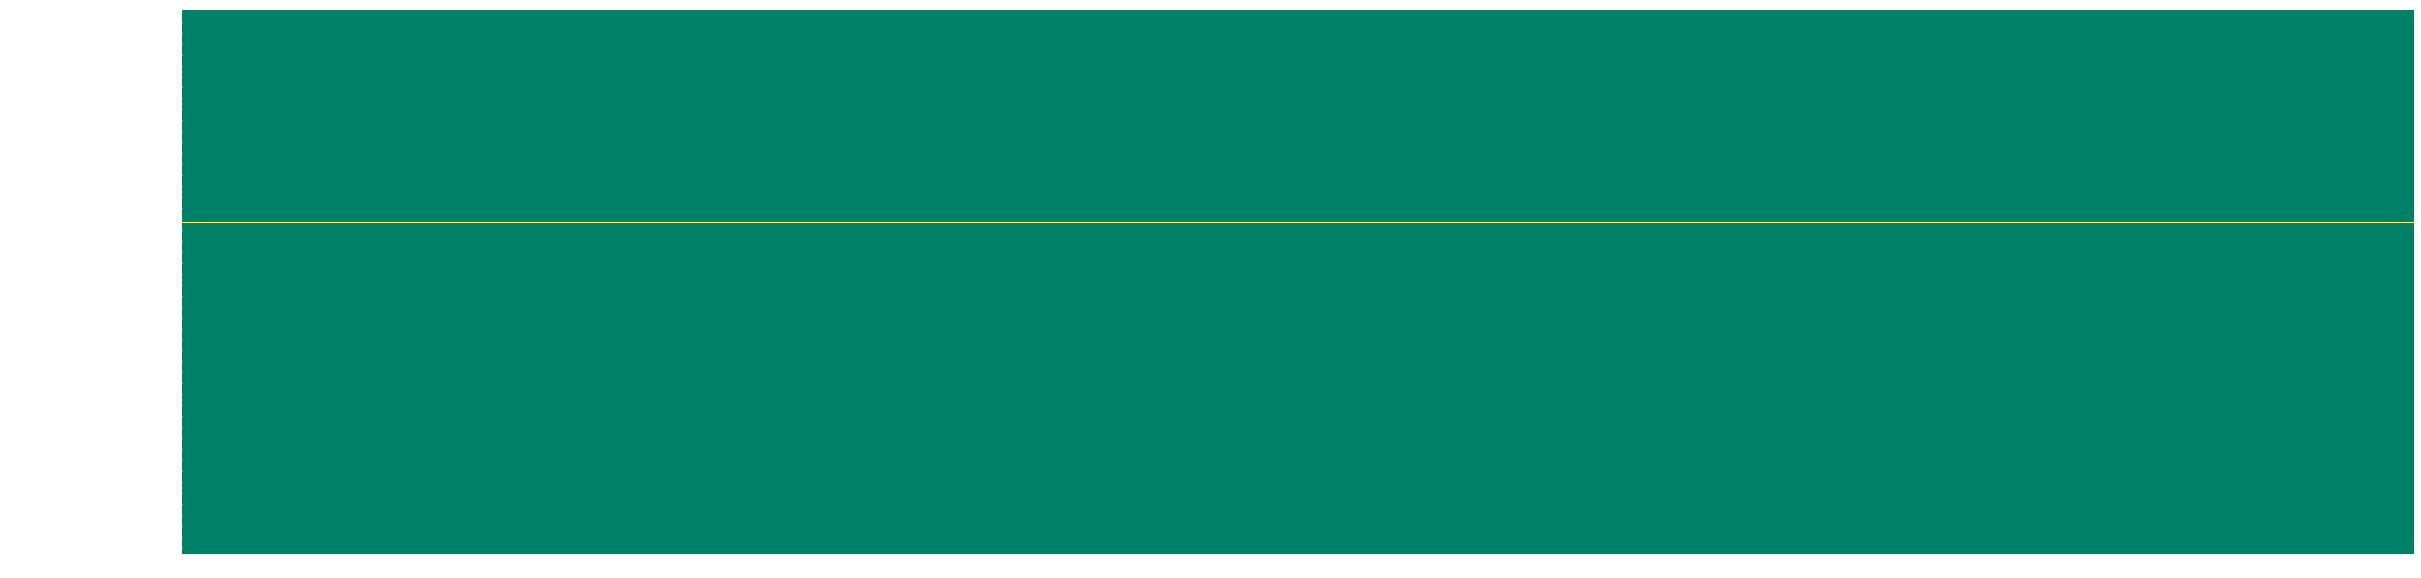

In [29]:
plt.figure(figsize=(40,10))

sns.heatmap(output[output.columns[np.where(output.isnull().sum()<3)[0]]].isnull(), 
            cbar=False, cmap = 'summer')


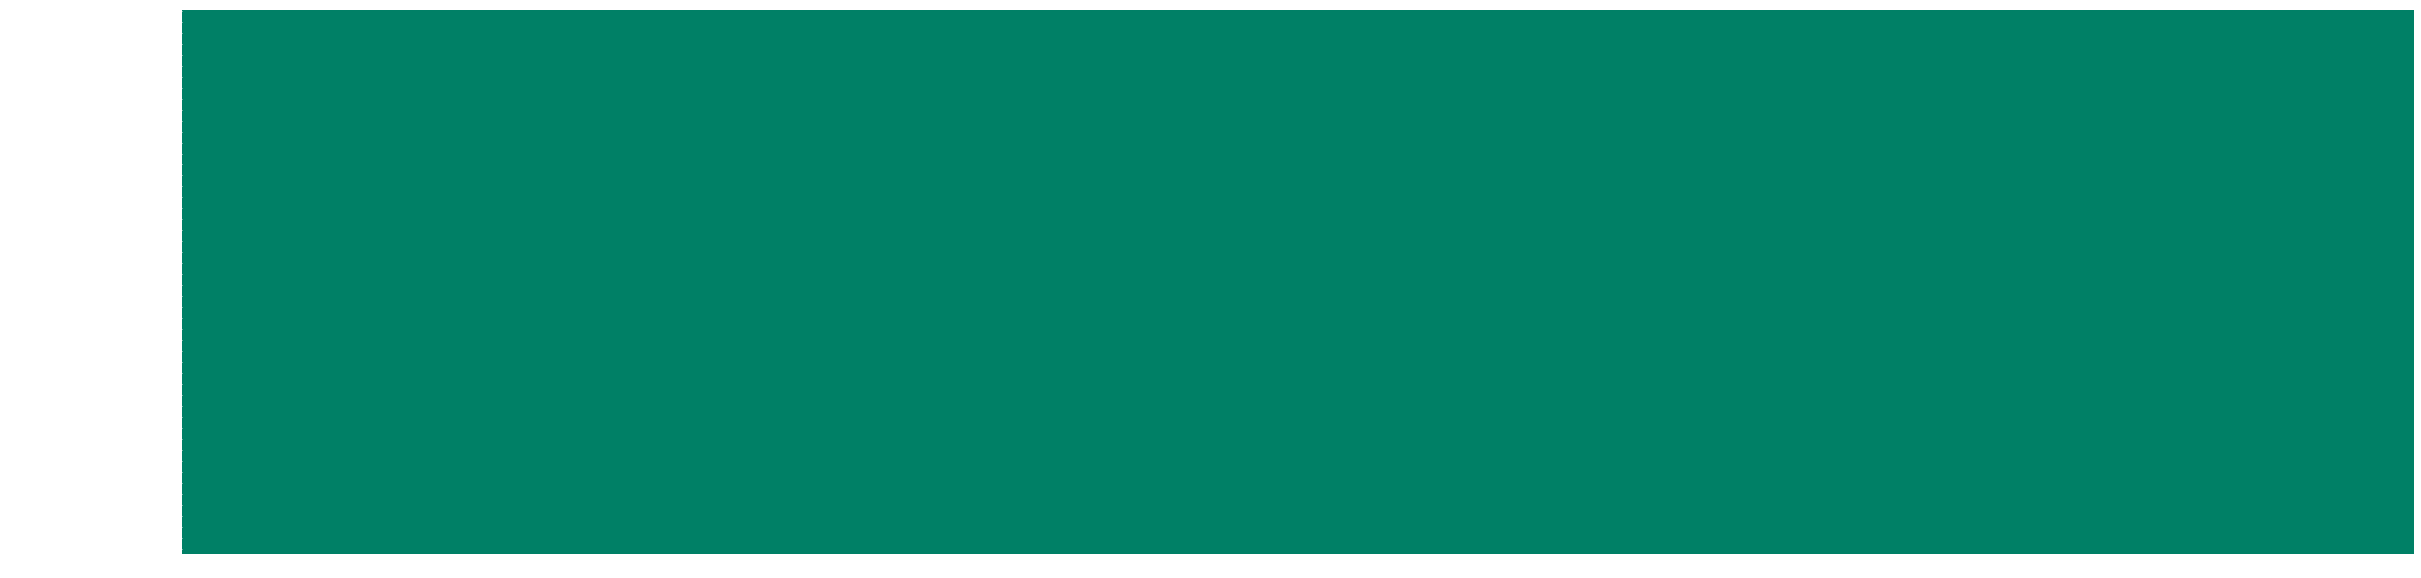

In [30]:
plt.figure(figsize=(40,10))

output=output[output.columns[np.where(output.isnull().sum()<3)[0]]].dropna()
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')


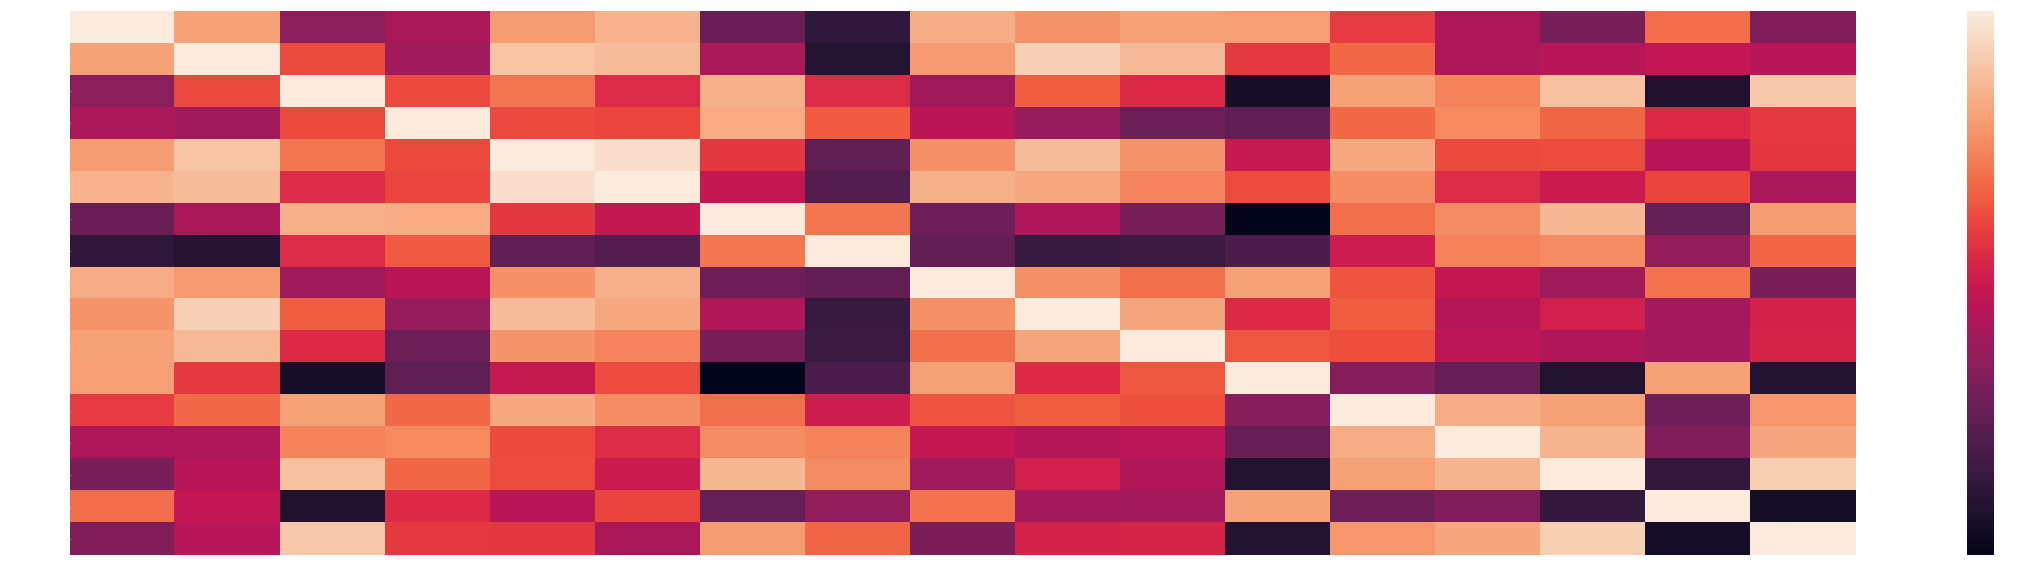

In [31]:

plt.figure(figsize=(40,10))
sns.heatmap(output.corr())

In [32]:
100*output.pct_change().describe()

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BPAC11.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA
count,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000
mean,0.006796,-0.016728,-0.051708,0.020516,0.005536,0.021648,-0.016523,0.015652,0.071428,0.022530,-0.077443,0.121431,-0.034093,-0.011663,-0.028674,0.090851,-0.138814
std,1.957192,3.742343,2.381283,1.967862,1.990958,2.085225,1.618712,2.440531,2.638894,3.205758,2.692172,3.016003,2.556979,2.280599,3.202913,1.966187,3.466714
min,-5.723908,-18.002750,-8.379887,-11.645728,-8.797030,-8.582741,-6.568146,-11.267605,-6.834352,-46.088260,-7.797359,-17.607569,-7.743151,-6.984391,-12.962968,-7.142851,-12.473576
25%,-1.210640,-2.015269,-1.592679,-1.032951,-1.210617,-1.165936,-1.026467,-1.375211,-1.652377,-1.370274,-1.594765,-1.544457,-1.512400,-1.360542,-1.877694,-1.231733,-2.173911
50%,-0.058487,-0.234736,-0.145448,0.000000,0.000000,-0.064696,0.000000,-0.199717,-0.039131,0.077262,-0.352481,-0.098828,-0.305653,-0.218467,-0.294582,0.079432,-0.455960
75%,1.132931,1.879308,1.374800,1.094916,1.125156,1.178972,0.906883,1.291210,1.702583,1.576648,1.268834,1.824342,1.537555,1.134079,1.408449,1.274515,1.734796
max,9.724050,18.434241,8.075039,7.248281,9.105259,9.498810,5.912961,14.648206,9.582428,7.577463,16.278068,10.136255,12.044200,10.245902,14.285722,7.732405,19.480522


In [33]:
output.pct_change().median()

ABEV3.SA    -0.000585
AZUL4.SA    -0.002347
B3SA3.SA    -0.001454
BBAS3.SA     0.000000
BBDC3.SA     0.000000
BBDC4.SA    -0.000647
BBSE3.SA     0.000000
BEEF3.SA    -0.001997
BPAC11.SA   -0.000391
BRAP4.SA     0.000773
BRFS3.SA    -0.003525
BRKM5.SA    -0.000988
BRML3.SA    -0.003057
CCRO3.SA    -0.002185
CIEL3.SA    -0.002946
CMIG4.SA     0.000794
COGN3.SA    -0.004560
dtype: float64

In [34]:
class report(object):
    def grafic_01(output,ativo):
            fig=plt.figure(figsize=(20,5));
            stock_return = output[ativo].pct_change()
            vol=100*stock_return.rolling(12).std() * np.sqrt(12)
            ax=vol.plot(x_compat=True,style='m',label='Volatilidade', title=ativo);
            plt.ylabel("Volatilidade [%]")
            output[ativo].plot(x_compat=True, secondary_y=True, style='y--',label='Volume');
            ax.right_ax.set_ylabel('Preço')
            fig.tight_layout()
            plt.grid(False)
            pass
    def grafic_02(output,ativo):
            fig=plt.figure(figsize=(20,5));
            ax = fig.add_subplot(111)
            stock_return=100*output[ativo].pct_change()
            stock_return.hist(bins=len(output), density = True,color='c')
            stock_return.plot(kind = "kde")
            plt.axvline(stock_return.mean(), color='k', linestyle='dashed', linewidth=5)            
            plt.title(ativo+': RMD = '+str(round(stock_return.mean(),2))+'% e '+'SMD = '
                      +str(round(stock_return.std(),2))+'%',fontsize=16)  
            ax.grid(False)
            ax.set_xlabel("Retorno Diário [%]", fontsize=12)
            ax.set_ylabel("Densidade", fontsize=12)
            fig.tight_layout()
            pass
    def grafic_03(output,ativo1,ativo2):
            ativo1_close_return=100*output[ativo1].pct_change().dropna()
            ativo2_close_return=100*output[ativo2].pct_change().dropna()        
            X = ativo1_close_return
            X = sm.add_constant(X)
            y = ativo2_close_return
            model = sm.OLS(y,X).fit()
            beta = model.params[1]
            alpha = model.params[0]
            fig, ax1 = plt.subplots(1,figsize=(5,5))
            ax1.scatter(X[X.columns[1]],y,label="Retorno Diário", color='blue', edgecolors='none', alpha=0.7)
            X_prime_0 = np.linspace(X[X.columns[1]].min(),X[X.columns[1]].max(), 100)
            X_prime = sm.add_constant(X_prime_0)
            y_hat = model.predict(X_prime)
            ax1.scatter(X_prime_0,y_hat,label="Retorno Diário", color='red', edgecolors='none', alpha=0.5)
            ax1.grid(True)
            ax1.set_xlabel("Retorno Diário "+ativo1+" [%]",fontsize=16)
            ax1.set_ylabel("Retorno Diário "+ativo2+" [%]", fontsize=16)
            ax1.set_title("Alpha = "+str(round(alpha,2))+", Beta = "+str(round(beta,2)), fontsize=16)
            return model
    def grafic_04(output):
            fig = plt.figure(figsize=(20, 5))
            ax = fig.add_subplot(111)
            bp = ax.boxplot(output.values)
            pass
    def grafic_05(output):
            sns.pairplot(output)
            pass

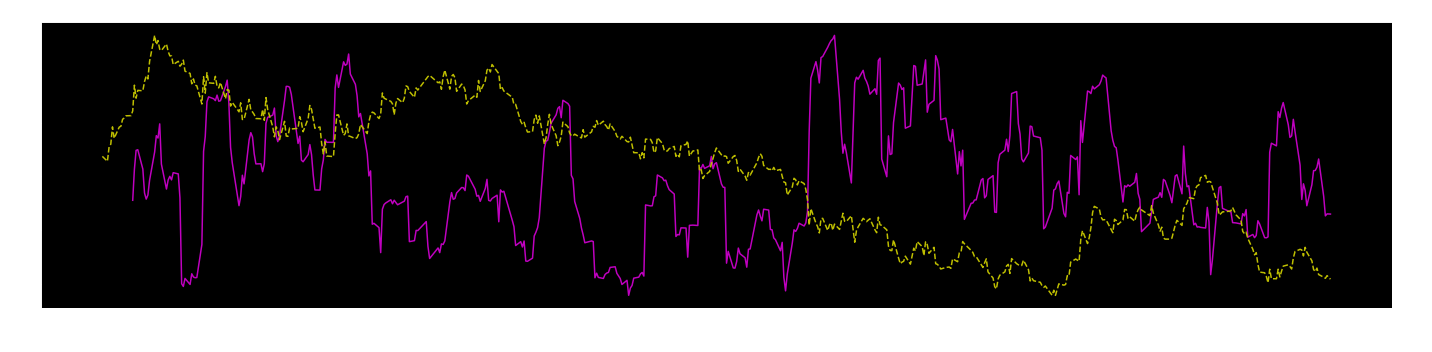

In [35]:
%matplotlib inline 
report.grafic_01(output,'B3SA3.SA')

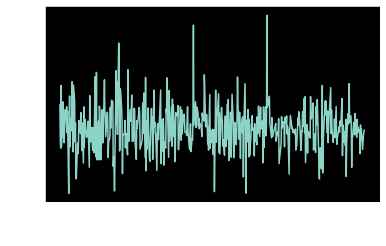

In [38]:
output[output.columns[0]].pct_change().plot()

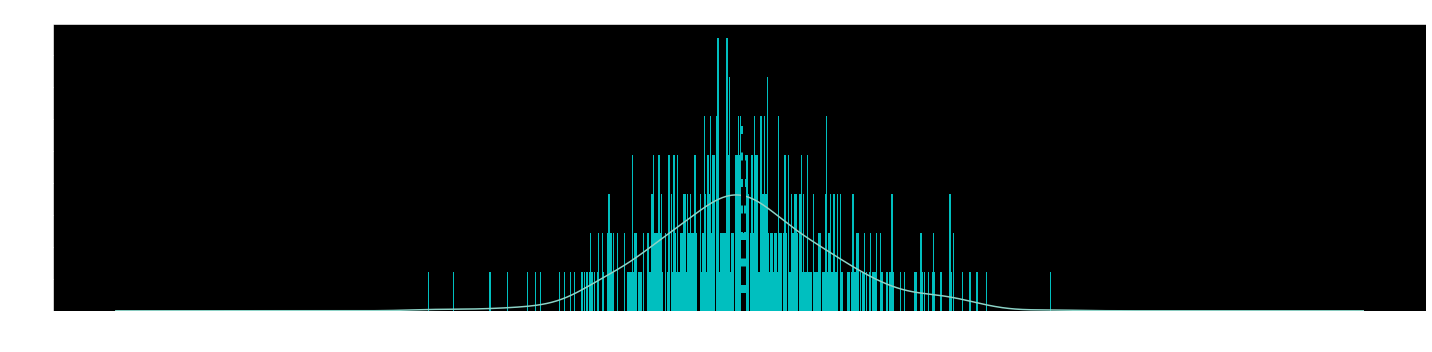

In [39]:
%matplotlib inline 
report.grafic_02(output,'B3SA3.SA')

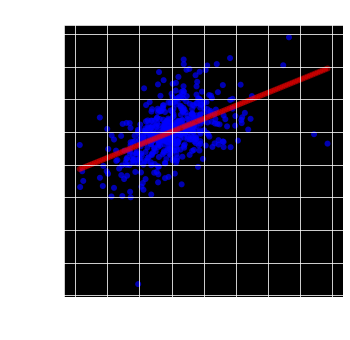

In [40]:
%matplotlib inline 
import statsmodels.api as sm
model=report.grafic_03(output,'ABEV3.SA','BBAS3.SA')

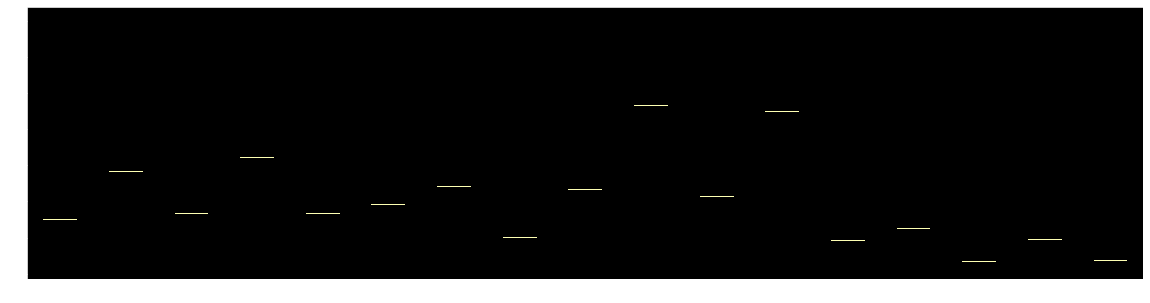

In [41]:
%matplotlib inline 
report.grafic_04(output)

In [42]:
100*output.pct_change().describe()

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BPAC11.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA
count,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000
mean,0.006796,-0.016728,-0.051708,0.020516,0.005536,0.021648,-0.016523,0.015652,0.071428,0.022530,-0.077443,0.121431,-0.034093,-0.011663,-0.028674,0.090851,-0.138814
std,1.957192,3.742343,2.381283,1.967862,1.990958,2.085225,1.618712,2.440531,2.638894,3.205758,2.692172,3.016003,2.556979,2.280599,3.202913,1.966187,3.466714
min,-5.723908,-18.002750,-8.379887,-11.645728,-8.797030,-8.582741,-6.568146,-11.267605,-6.834352,-46.088260,-7.797359,-17.607569,-7.743151,-6.984391,-12.962968,-7.142851,-12.473576
25%,-1.210640,-2.015269,-1.592679,-1.032951,-1.210617,-1.165936,-1.026467,-1.375211,-1.652377,-1.370274,-1.594765,-1.544457,-1.512400,-1.360542,-1.877694,-1.231733,-2.173911
50%,-0.058487,-0.234736,-0.145448,0.000000,0.000000,-0.064696,0.000000,-0.199717,-0.039131,0.077262,-0.352481,-0.098828,-0.305653,-0.218467,-0.294582,0.079432,-0.455960
75%,1.132931,1.879308,1.374800,1.094916,1.125156,1.178972,0.906883,1.291210,1.702583,1.576648,1.268834,1.824342,1.537555,1.134079,1.408449,1.274515,1.734796
max,9.724050,18.434241,8.075039,7.248281,9.105259,9.498810,5.912961,14.648206,9.582428,7.577463,16.278068,10.136255,12.044200,10.245902,14.285722,7.732405,19.480522


In [43]:
output.corr()

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BPAC11.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA
ABEV3.SA,1.000000,0.656512,-0.186344,-0.064178,0.628266,0.729095,-0.337080,-0.611547,0.701407,0.598529,0.649758,0.635040,0.252804,-0.050966,-0.273603,0.439431,-0.237555
AZUL4.SA,0.656512,1.000000,0.299841,-0.097780,0.812030,0.771387,-0.067721,-0.661501,0.625537,0.869730,0.757753,0.244969,0.417783,-0.053182,0.001202,0.041691,0.002545
B3SA3.SA,-0.186344,0.299841,1.000000,0.298941,0.466021,0.178612,0.719440,0.179592,-0.108838,0.380349,0.175297,-0.720604,0.649142,0.522326,0.797248,-0.680775,0.833510
BBAS3.SA,-0.064178,-0.097780,0.298941,1.000000,0.298786,0.297589,0.698776,0.369307,0.004538,-0.139797,-0.327394,-0.388242,0.421851,0.551655,0.411044,0.172096,0.240407
BBDC3.SA,0.628266,0.812030,0.466021,0.298786,1.000000,0.938289,0.238646,-0.382007,0.579760,0.775190,0.598005,0.067061,0.689681,0.304167,0.314576,-0.000122,0.239243
BBDC4.SA,0.729095,0.771387,0.178612,0.297589,0.938289,1.000000,0.058141,-0.434736,0.720422,0.680790,0.529693,0.316258,0.563101,0.182086,0.077806,0.289111,-0.055223
BBSE3.SA,-0.337080,-0.067721,0.719440,0.698776,0.238646,0.058141,1.000000,0.475468,-0.316969,-0.036440,-0.275208,-0.834547,0.446816,0.556013,0.749282,-0.359554,0.629081
BEEF3.SA,-0.611547,-0.661501,0.179592,0.369307,-0.382007,-0.434736,0.475468,1.000000,-0.368477,-0.566334,-0.550391,-0.465715,0.092024,0.522992,0.562433,-0.156440,0.408766
BPAC11.SA,0.701407,0.625537,-0.108838,0.004538,0.579760,0.720422,-0.316969,-0.368477,1.000000,0.578050,0.445985,0.645236,0.346904,0.056229,-0.107741,0.450079,-0.256564
BRAP4.SA,0.598529,0.869730,0.380349,-0.139797,0.775190,0.680790,-0.036440,-0.566334,0.578050,1.000000,0.675908,0.170678,0.382279,-0.014104,0.122847,-0.082792,0.128387


In [ ]:
#%matplotlib inline 
report.grafic_05(output)

In [41]:
output.pct_change().iloc[1:].corr()

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BPAC11.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA
ABEV3.SA,1.000000,0.527634,0.462156,0.560879,0.612307,0.588348,0.489211,0.254999,0.435686,0.375495,0.533086,0.433926,0.453763,0.496685,0.336378,0.480628,0.423448,0.593410,0.548952
AZUL4.SA,0.527634,1.000000,0.548046,0.658913,0.629443,0.634478,0.455233,0.274523,0.560102,0.410276,0.588453,0.439353,0.508682,0.675648,0.358975,0.634889,0.468583,0.607188,0.611279
B3SA3.SA,0.462156,0.548046,1.000000,0.666446,0.651448,0.607602,0.590659,0.290643,0.647241,0.481986,0.622367,0.415030,0.484440,0.572328,0.487802,0.704633,0.461369,0.595239,0.512418
BBAS3.SA,0.560879,0.658913,0.666446,1.000000,0.897698,0.878681,0.645564,0.253708,0.629702,0.504523,0.712768,0.475532,0.586726,0.670453,0.418935,0.717014,0.538958,0.705422,0.598615
BBDC3.SA,0.612307,0.629443,0.651448,0.897698,1.000000,0.958957,0.663764,0.251423,0.632477,0.538783,0.677922,0.470616,0.548923,0.647695,0.402586,0.676393,0.510165,0.712318,0.580473
BBDC4.SA,0.588348,0.634478,0.607602,0.878681,0.958957,1.000000,0.634574,0.236286,0.605154,0.509022,0.638364,0.480014,0.517883,0.650240,0.365715,0.647319,0.489795,0.688535,0.561693
BBSE3.SA,0.489211,0.455233,0.590659,0.645564,0.663764,0.634574,1.000000,0.140249,0.535548,0.423443,0.562237,0.377666,0.422028,0.503002,0.457553,0.574484,0.483595,0.574763,0.495389
BEEF3.SA,0.254999,0.274523,0.290643,0.253708,0.251423,0.236286,0.140249,1.000000,0.294121,0.342137,0.227116,0.512130,0.266645,0.220929,0.346731,0.302955,0.168566,0.274195,0.223349
BPAC11.SA,0.435686,0.560102,0.647241,0.629702,0.632477,0.605154,0.535548,0.294121,1.000000,0.406750,0.576579,0.401876,0.492018,0.571493,0.480349,0.630322,0.437195,0.609999,0.506141
BRAP4.SA,0.375495,0.410276,0.481986,0.504523,0.538783,0.509022,0.423443,0.342137,0.406750,1.000000,0.431163,0.398299,0.455921,0.333894,0.381821,0.497121,0.371657,0.420982,0.376174


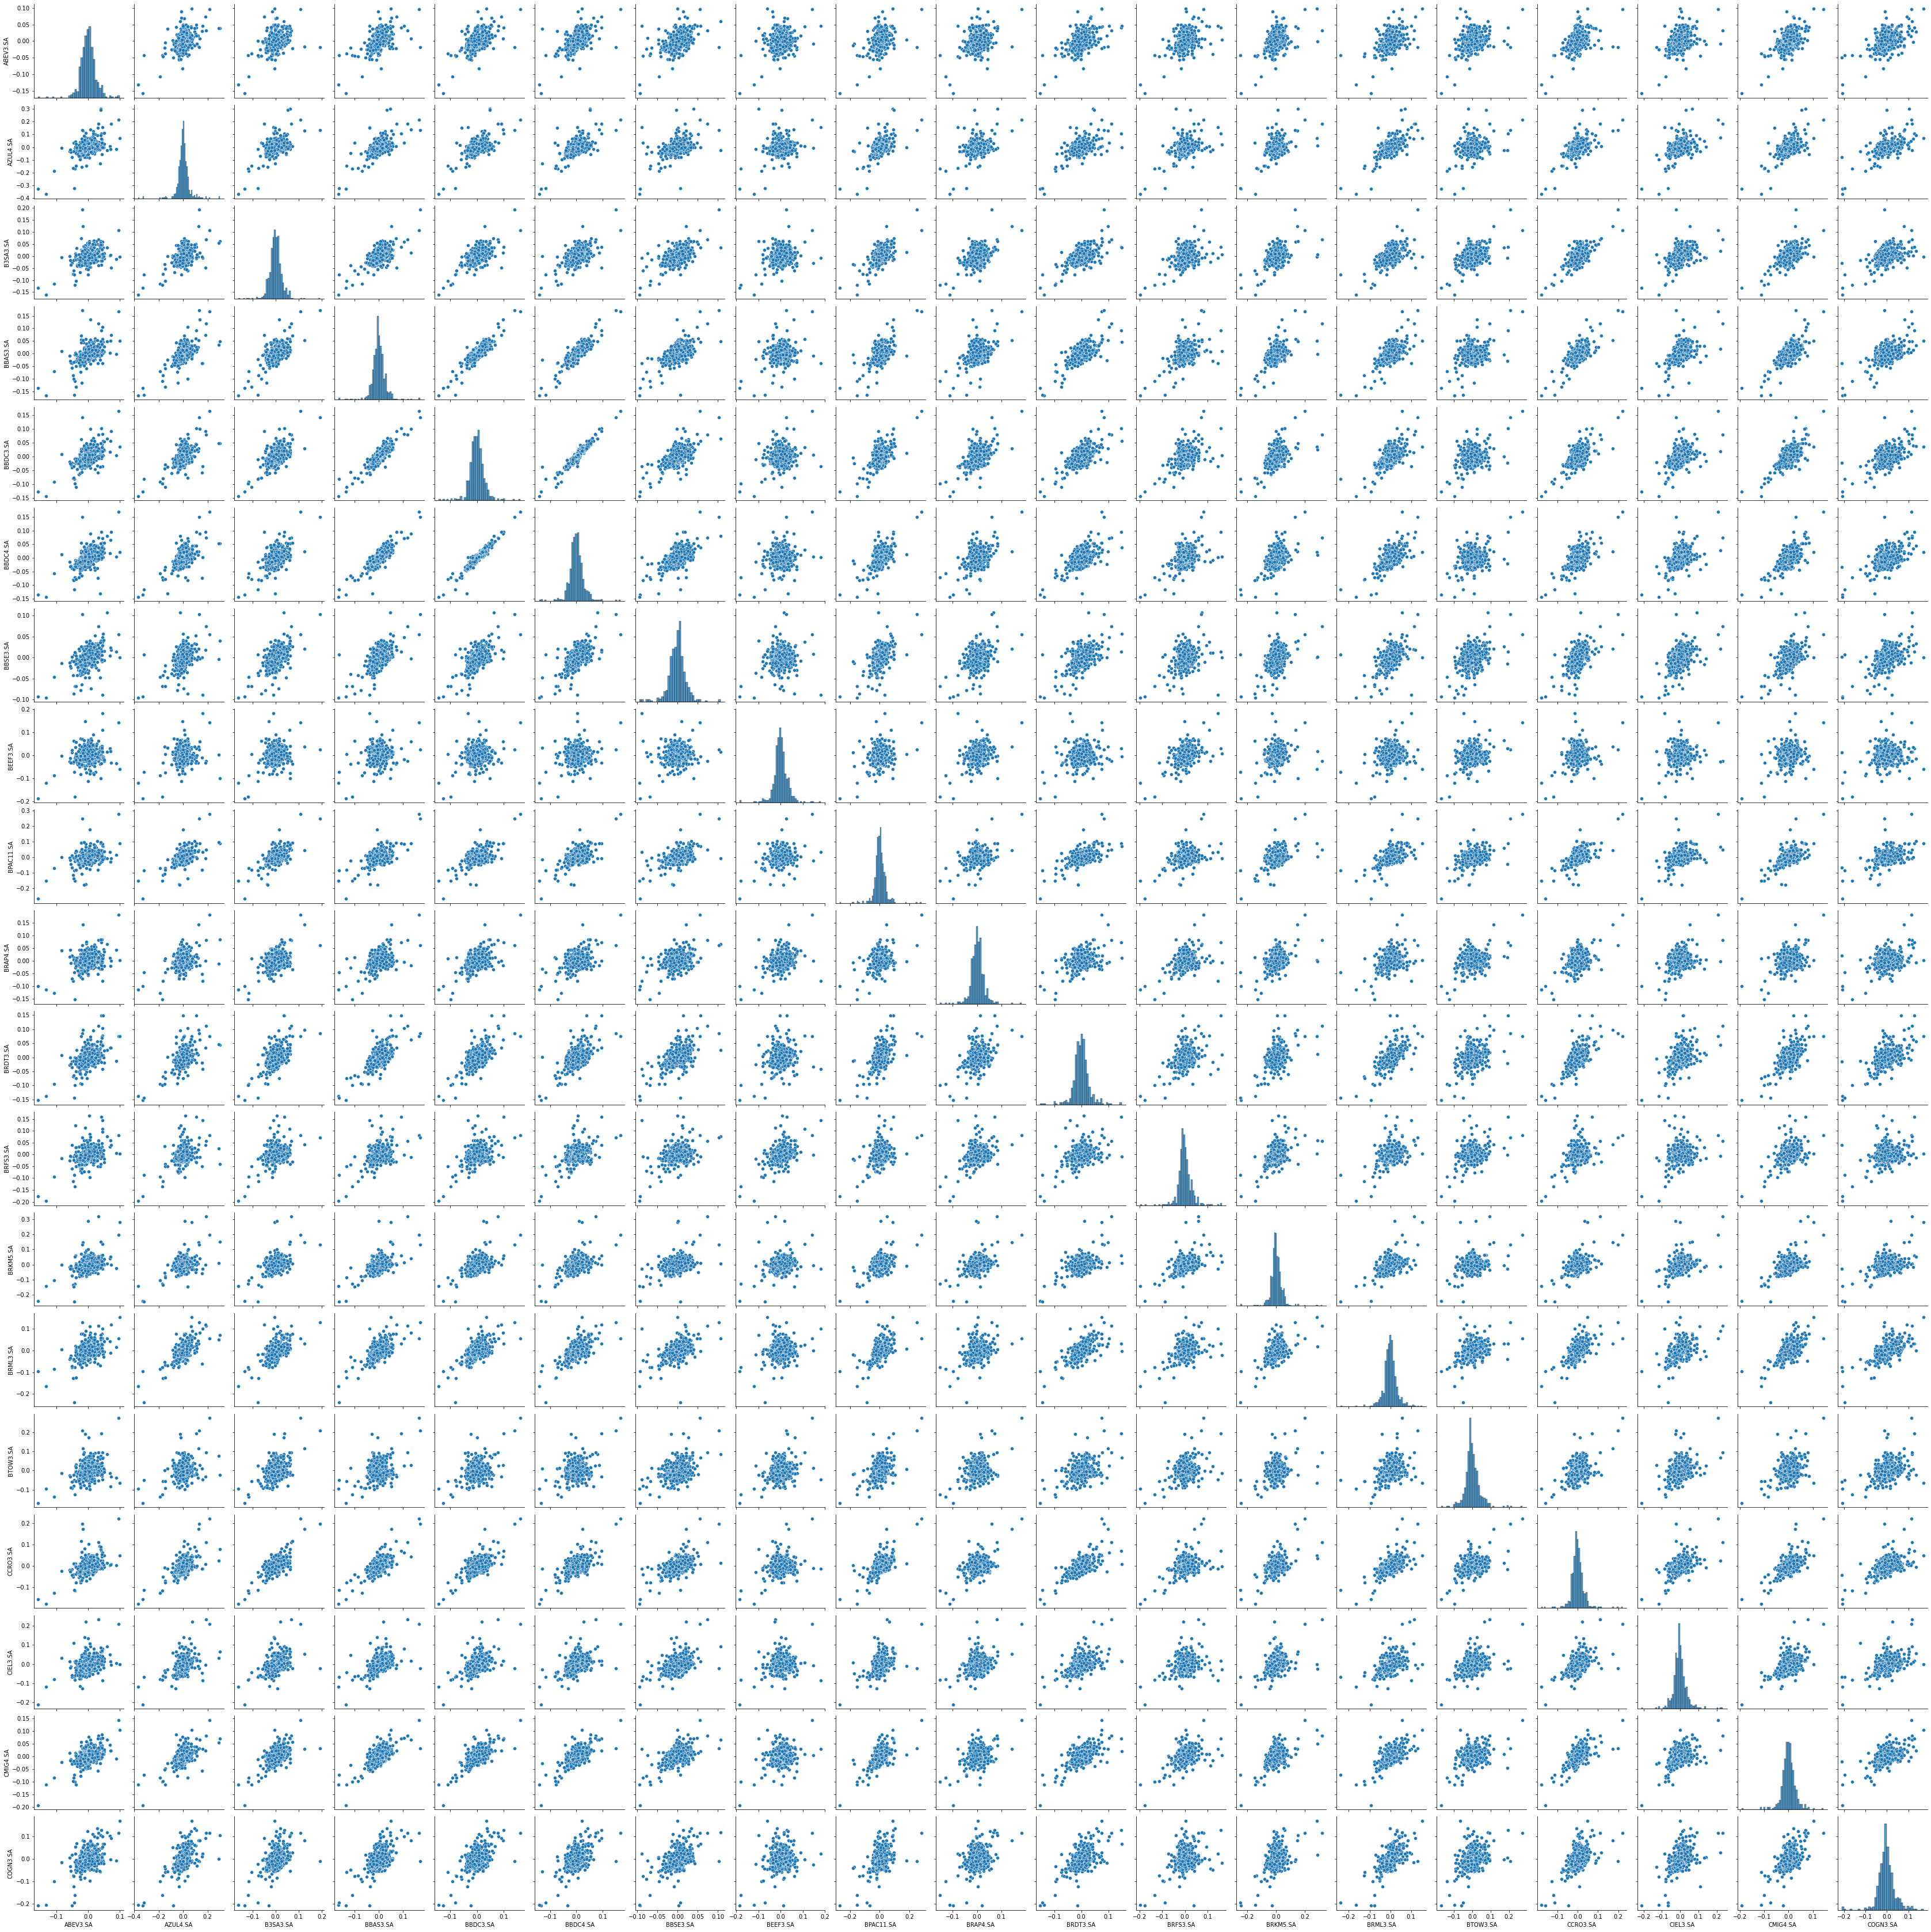

In [42]:
%matplotlib inline 
report.grafic_05(output.pct_change().dropna())